In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf

## This Jupyter notebook is for the week 4 Kaggle mini-project for Introduction to Deep Learning.

## The data is from a Kaggle competition called "Natural Language Processing with Disaster Tweets".

## Citation: Addison Howard, devrishi, Phil Culliton, and Yufeng Guo. Natural Language Processing with Disaster Tweets. https://kaggle.com/competitions/nlp-getting-started, 2019. Kaggle.

## The web address for the GitHub repository for this Kaggle mini-project is:
## https://github.com/seaocelot/Deep_Learning_Week_4_Colorado_Boulder.git

# Project Topic and Description of Problem.

## The objective of this deep learning project is to classify tweets as either reporting about legitimate natural disasters or not. Different types of RNN neural network architectures and different values of selected hyperparameters will be tested to see how good the predictive power of an RNN neural network can become at predicting whether or not a tweet is reporting a legitimate natural disaster.

## Using RNN neural networks to classify tweets as either reporting about legitimate natural disasters or not is an example of natural language processing. In general, natural language processing utilizes computers and various algorithms to perform some type of analysis of text. Such analysis can include anything from searching for certain words in text, identifying patterns in text, to deciphering the meaning of text. In the case of this particular project, the goal of the natural language processing is to analyze the individual tweets and to properly classify those that are reporting about natural disasters that are real and those that are not. Please see the list of references at the end of this notebook for the references I used to understand natural language processing.

# Data.

## Below is a csv file that is uploaded from the Kaggle web site. It is opened as a pandas dataframe.

## The data is train data and each row of the dataframe contains a numeric id as an integer, a keyword as a string, a location as a string, text as a string which is the tweet, and a numeric target as an integer. Each individual tweet was read by a human and a value for the target was assigned. If the target was considered to be reporting a legitimate natural disaster then it was assigned a "1", otherwise it was assigned a "0".

## Train data is opened as pandas dataframe.

In [2]:
# open csv file that contains train data as pandas dataframe
train_data_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

## The head of the train dataframe is shown below.

In [4]:
# display head of pandas dataframe that contains train data
train_data_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Basic information about the train dataframe is shown below.

In [5]:
# display basic information about pandas dataframe that contains train data
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Below are three examples of tweets and their corresponding labels from the train data.

In [12]:
# print three examples of tweets
print("The tweet at row 6 is: " + train_data_df["text"][6])
print("The label at row 6 is: " + str(train_data_df["target"][6]) + "\n")

print("The tweet at row 22 is: " + train_data_df["text"][22])
print("The label at row 22 is: " + str(train_data_df["target"][22]) + "\n")

print("The tweet at row 2350 is: " + train_data_df["text"][2350])
print("The label at row 2350 is: " + str(train_data_df["target"][2350]))

The tweet at row 6 is: #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
The label at row 6 is: 1

The tweet at row 22 is: Love skiing
The label at row 22 is: 0

The tweet at row 2350 is: Last chance to work at the old FFA foodstand at the fairgrounds. We are finishing demolition at 9am.  Any help would be appreciated
The label at row 2350 is: 0


## For this analysis, only the information contained in the "text" column will be fed into the neural network. The information contained in the "keyword" and "location" columns will not be used. As such, a modified dataframe that does not include the columns "keyword" and "location" is created below. 

In [3]:
# create dataframe that does not include columns "keyword" and "location" from dataframe that contains train data
train_data_modified_df = train_data_df[["id", "text", "target"]].copy()

# Data Cleaning.

## The values Na, NaN, and None are searched for in the columns "id", "text", and "target" in the modified train dataframe.

In [7]:
# print number of Na, NaN, or None values for columns "id", "text", and "target"
for column_name in train_data_modified_df.columns:
    print("The number of Na, NaN, or None values in the " + column_name + " column is: " + str(sum(train_data_modified_df[column_name].isna())))

The number of Na, NaN, or None values in the id column is: 0
The number of Na, NaN, or None values in the text column is: 0
The number of Na, NaN, or None values in the target column is: 0


## The value Null is searched for in the columns "id", "text", and "target" in the modified train dataframe.

In [8]:
# print number of Null values for columns "id", "text", and "target"
for column_name in train_data_modified_df.columns:
    print("The number of Null values in the " + column_name + " column is: " + str(sum(train_data_modified_df[column_name].isnull())))

The number of Null values in the id column is: 0
The number of Null values in the text column is: 0
The number of Null values in the target column is: 0


## The value ? is searched for in the columns "id", "text", and "target" in the modified train dataframe.

In [9]:
# print number of ? values for columns "id", "text", and "target"
for column_name in train_data_modified_df.columns:
    print("The number of ? values in the " + column_name + " column is: " + str(sum(train_data_modified_df[column_name] == "?")))

The number of ? values in the id column is: 0
The number of ? values in the text column is: 0
The number of ? values in the target column is: 0


# Exploratory Data Analysis.

## A histogram of the word count per tweet is generated below.

In [4]:
# calculate word count per article
list_word_counts = []
for entry in train_data_modified_df['text']: 
    word_count = len(str(entry).split()) 
    list_word_counts.append(word_count)

In [5]:
# add new column to modified train data frame for word counts
train_data_modified_df['word count'] = list_word_counts

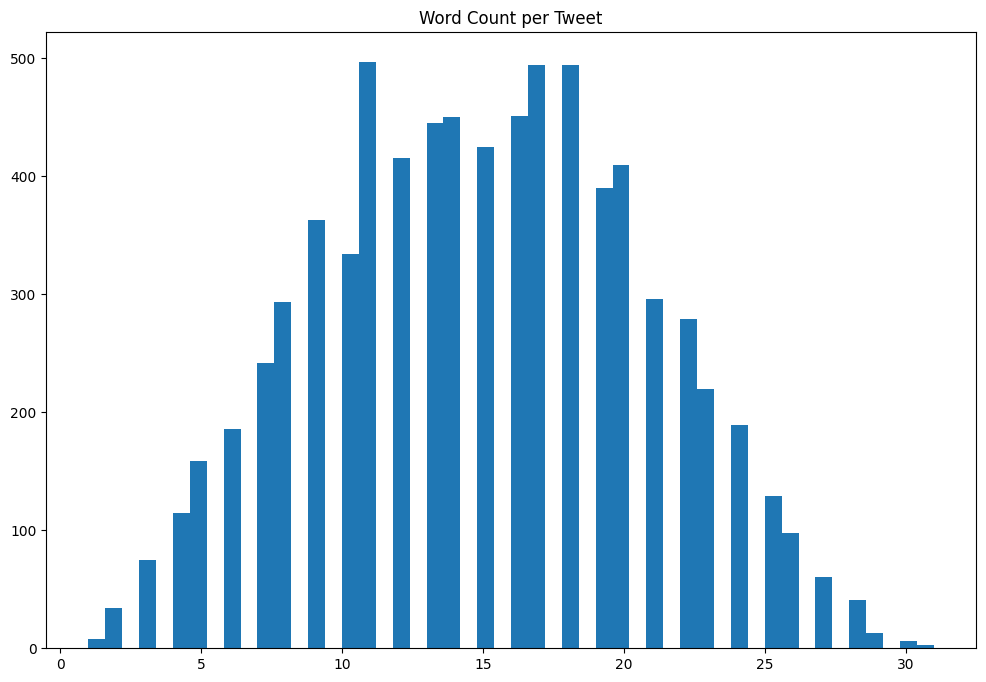

In [6]:
# create histogram for word count per tweet
plt. figure(figsize=(12, 8))
plt.hist(train_data_modified_df['word count'], bins = 50)
plt.title('Word Count per Tweet')
plt.show()

## The histogram for the number of sentences in each tweet is generated below.
## It is important to note that not all tweets are necessarily written using complete sentences, so one must interpret this histogram carefully.

In [7]:
# calculate sentence count per article
list_sentence_counts = []
for entry in train_data_modified_df['text']:
    tally_period = entry.count(".")
    tally_exclamation = entry.count("!")
    tally_question = entry.count("?")
    total_tally = tally_period + tally_exclamation + tally_question 
    list_sentence_counts.append(total_tally)
    tally_period = 0
    tally_exclamation = 0
    tally_question = 0
    total_tally = 0

In [8]:
# add new column to modified train data frame
train_data_modified_df['sentence count'] = list_sentence_counts

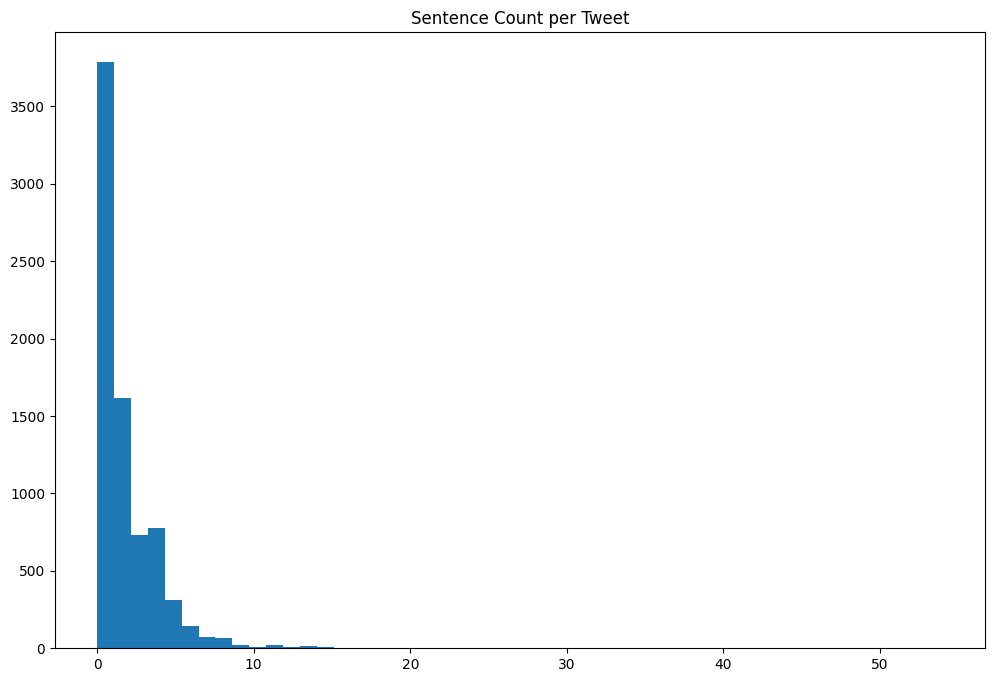

In [9]:
# create histogram for sentence count per tweet
plt. figure(figsize=(12, 8))
plt.hist(train_data_modified_df['sentence count'], bins = 50)
plt.title('Sentence Count per Tweet')
plt.show()

## Below is a historgram showing the distribution of labels of the train data. Label "1" represents a tweet that is a disaster tweet and label "0" represents a tweet that is not a disaster tweet.

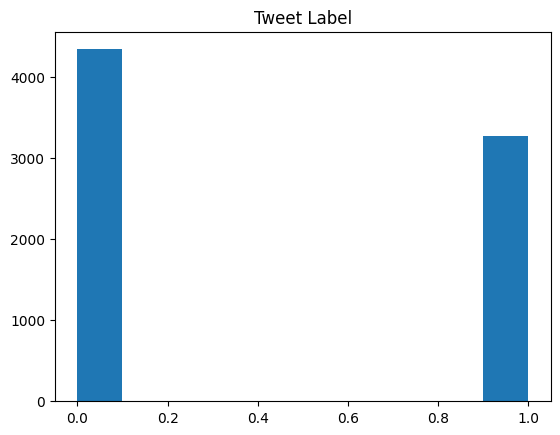

In [18]:
plt.hist(train_data_modified_df['target'])

plt.title('Tweet Label')

plt.show()

## When looking at the above histogram there is some imbalance seen in the data in which there are a greater number of tweets classified as not reporting legitimate natural disasters. Since the imbalance is not extreme, I do not believe it will have a major impact on the performance of the neural network.

## Overall, after conducting the exploratory data analysis, I believe the data is in good shape to be prepared to be fed into a neural network.

# Data Preparation.

## Separate out train input data and train targets for neural networks.

In [4]:
# separate out input and target data for train data
train_input_data = train_data_modified_df["text"].copy()

train_target_data = train_data_modified_df["target"].copy()

## Before the input data can be passed into a neural network, the raw text must be converted into matrices of numeric values through a process known as word embedding.
## Each tweet from the train input data is converted from text to a sequence of integers using the Keras Tokenizer. Each sequence of integers is then padded with zeroes so that each sequence is of the same length.
## The padded sequences are then passed into a Keras neural network model in which the first layer is an embedding layer. The embedding layer converts the sequences of integers into dense arrays which are then passed along to the next layer in the neural network which is some type of RNN layer in the models used in this notebook.
## Please see the list of references at the end of this notebook for the references I used to understand word embedding.

In [5]:
# tweets from train input data are converted to sequences of integers using Keras Tokenizer
train_input_data_list = train_input_data.to_list()

token_machine = tf.keras.preprocessing.text.Tokenizer()

token_machine.fit_on_texts(train_input_data_list)

train_input_data_list_tokenized = token_machine.texts_to_sequences(train_input_data_list)

train_input_data_list_tokenized

# sequences are padded to that each sequence is of equal length
train_input_data_list_tokenized_padded = tf.keras.preprocessing.sequence.pad_sequences(train_input_data_list_tokenized)

train_input_data_transformed = train_input_data_list_tokenized_padded

## The train target data is converted to a NumPy array so neural networks created using Keras run properly.

In [6]:
# convert "train_target_data" to NumPy array 
train_target_data_np = np.array(train_target_data.to_list()) 

# Model building and training.

## For all of the models an embedding layer and output layer are included. 

## For models 1 through 7, the RNN layers that are included use the GRU layer option. All of the GRU layers use the tanh activation. The output layer uses a sigmoid activation. The loss function is binary crossentropy. The performance metric used is accuracy. I tried to run the models using the F1 score metric because that is what the Kaggle competition uses, but the models did not appear to run properly. The ways in which the models 1 through 7 differ from one another are described for each individual model.

## For model 8, the model is identical to model 1 except that the RNN layer that is included uses the LSTM layer option. 

## For model 9, the model is identical to model 1 except that the RNN layer that is included uses the SimpleRNN layer option. 

## Model 1: A single GRU layer is used. The number of units in the GRU layer is 8. No kernel regularizer is used. The optimizer is adam. 

In [7]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# GRU layer
model.add(tf.keras.layers.GRU(units = 8, activation = 'tanh', return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5354 - loss: 0.6919 - val_accuracy: 0.5345 - val_loss: 0.6902
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5791 - loss: 0.6862 - val_accuracy: 0.5345 - val_loss: 0.6860
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5787 - loss: 0.6788 - val_accuracy: 0.5345 - val_loss: 0.6787
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5795 - loss: 0.6667 - val_accuracy: 0.5351 - val_loss: 0.6639
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6117 - loss: 0.6447 - val_accuracy: 0.6507 - val_loss: 0.6403
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6926 - loss: 0.6141 - val_accuracy: 0.6756 - val_loss: 0.6206
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7113 - loss: 0.5868 - val_accuracy: 0.6914 - val_loss: 0.6053
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7328 - loss: 0.5592 - val_accuracy: 0.

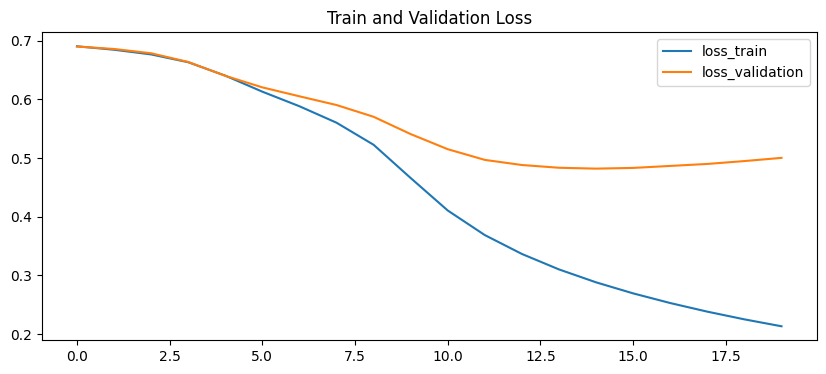

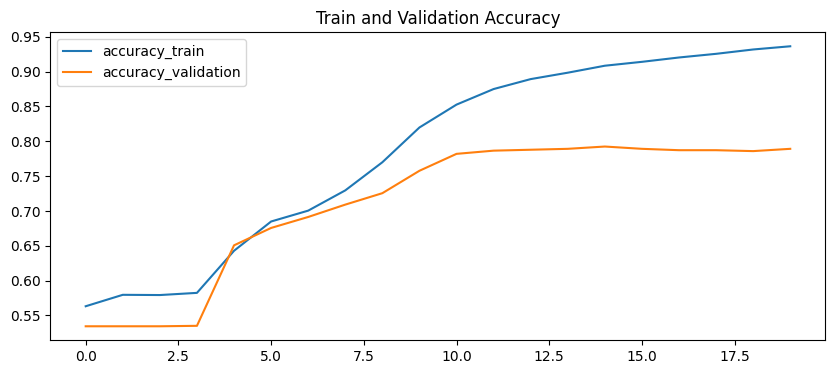

In [8]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 2: A single GRU layer is used. The number of units in the GRU layer is 8. No kernel regularizer is used. The optimizer is SGD. 

In [9]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# GRU layer
model.add(tf.keras.layers.GRU(units = 8, activation = 'tanh', return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4900 - loss: 0.6931 - val_accuracy: 0.4412 - val_loss: 0.6935
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5015 - loss: 0.6929 - val_accuracy: 0.4557 - val_loss: 0.6934
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5200 - loss: 0.6926 - val_accuracy: 0.4754 - val_loss: 0.6932
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5323 - loss: 0.6924 - val_accuracy: 0.4892 - val_loss: 0.6931
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5440 - loss: 0.6921 - val_accuracy: 0.5003 - val_loss: 0.6931
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5519 - loss: 0.6919 - val_accuracy: 0.5095 - val_loss: 0.6930
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5592 - loss: 0.6917 - val_accuracy: 0.5141 - val_loss: 0.6929
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5638 - loss: 0.6915 - val_accuracy: 0.

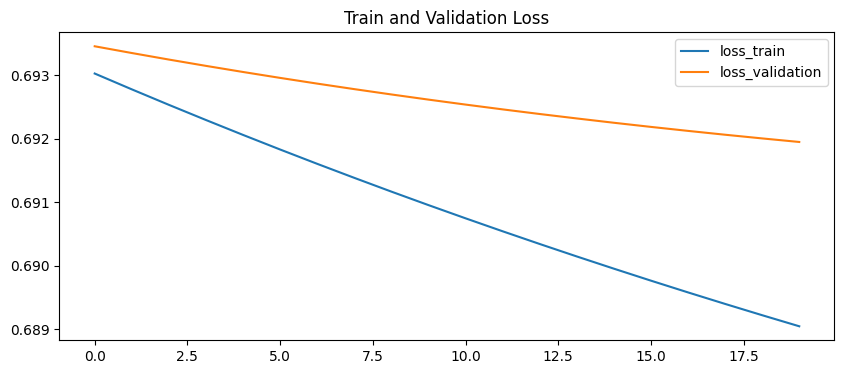

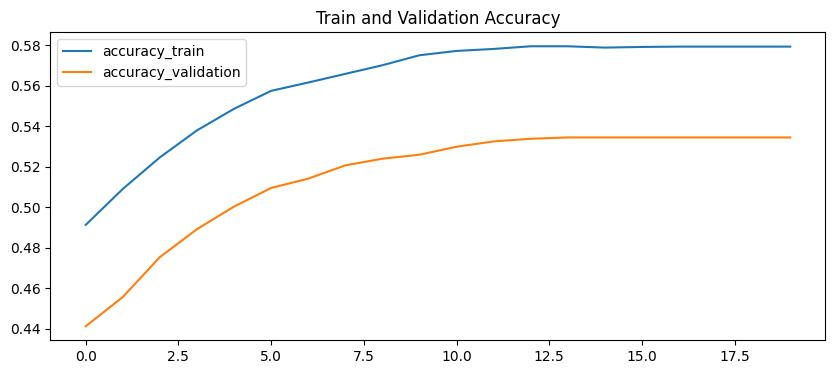

In [10]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 3: A single GRU layer is used. The number of units in the GRU layer is 16. No kernel regularizer is used. The optimizer is adam. 

In [11]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# GRU layer
model.add(tf.keras.layers.GRU(units = 16, activation = 'tanh', return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5570 - loss: 0.6904 - val_accuracy: 0.5345 - val_loss: 0.6849
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5787 - loss: 0.6762 - val_accuracy: 0.5345 - val_loss: 0.6649
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5903 - loss: 0.6439 - val_accuracy: 0.6507 - val_loss: 0.6334
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6852 - loss: 0.6064 - val_accuracy: 0.6835 - val_loss: 0.6103
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7191 - loss: 0.5714 - val_accuracy: 0.7072 - val_loss: 0.5865
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7680 - loss: 0.5165 - val_accuracy: 0.7479 - val_loss: 0.5439
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8307 - loss: 0.4340 - val_accuracy: 0.7630 - val_loss: 0.5117
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8647 - loss: 0.3734 - val_accuracy: 0.

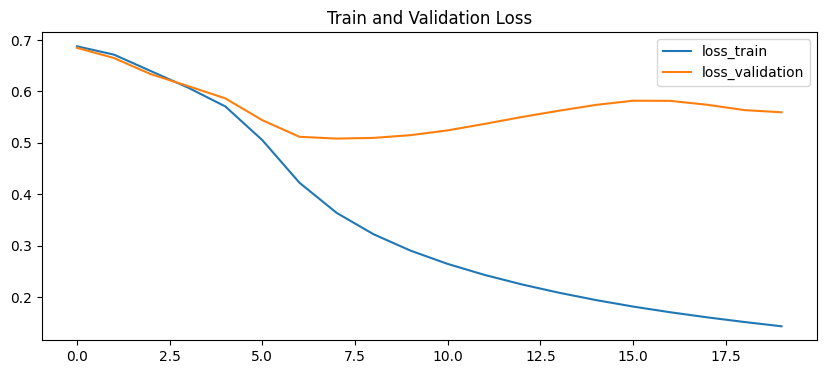

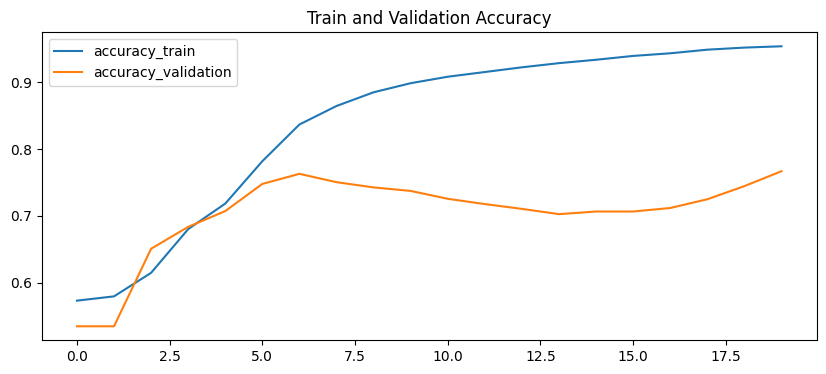

In [12]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 4: Two GRU layers are stacked together. The number of units in each of the GRU layers is 8. No kernel regularizer is used. The optimizer is adam. 

In [13]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# GRU layer
model.add(tf.keras.layers.GRU(units = 8, activation = 'tanh', return_sequences = True))

# GRU layer
model.add(tf.keras.layers.GRU(units = 8, activation = 'tanh', return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5535 - loss: 0.6908 - val_accuracy: 0.5345 - val_loss: 0.6864
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5787 - loss: 0.6791 - val_accuracy: 0.5345 - val_loss: 0.6731
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5832 - loss: 0.6581 - val_accuracy: 0.5863 - val_loss: 0.6457
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6680 - loss: 0.6239 - val_accuracy: 0.6934 - val_loss: 0.6182
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7043 - loss: 0.5887 - val_accuracy: 0.7065 - val_loss: 0.5969
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7417 - loss: 0.5476 - val_accuracy: 0.7413 - val_loss: 0.5684
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8015 - loss: 0.4799 - val_accuracy: 0.7748 - val_loss: 0.5169
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8577 - loss: 0.3917 - val_accuracy: 0.

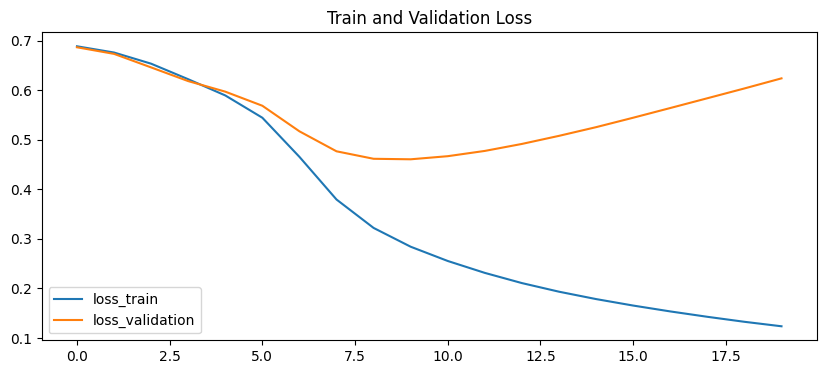

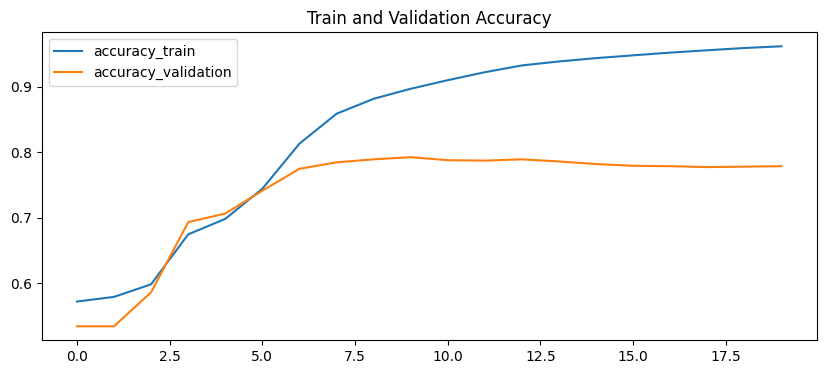

In [14]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 5: A bidirectional wrapper is placed around a single GRU layer. The number of units in the GRU layer is 8. No kernel regularizer is used. The optimizer is adam. 

In [15]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# GRU layer with bidirectional wrapper
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units = 8, activation = 'tanh', return_sequences = False)))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5424 - loss: 0.6903 - val_accuracy: 0.5345 - val_loss: 0.6883
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5787 - loss: 0.6779 - val_accuracy: 0.5345 - val_loss: 0.6808
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5787 - loss: 0.6647 - val_accuracy: 0.5345 - val_loss: 0.6631
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5996 - loss: 0.6403 - val_accuracy: 0.6625 - val_loss: 0.6323
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7052 - loss: 0.6011 - val_accuracy: 0.6993 - val_loss: 0.6040
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7388 - loss: 0.5587 - val_accuracy: 0.7131 - val_loss: 0.5769
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7962 - loss: 0.4988 - val_accuracy: 0.7557 - val_loss: 0.5415
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8391 - loss: 0.4346 - val_accuracy: 0.

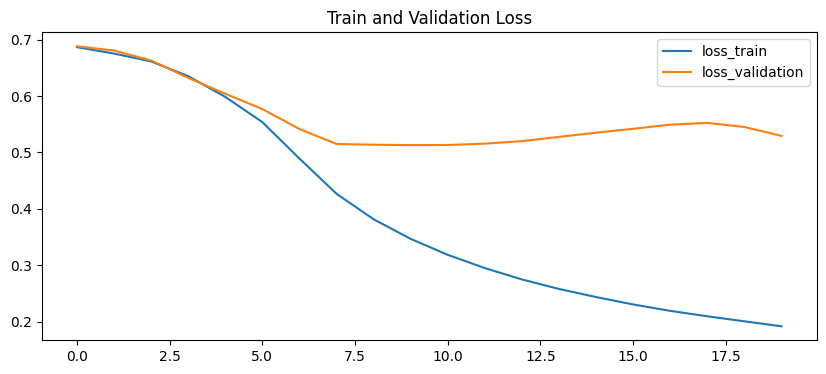

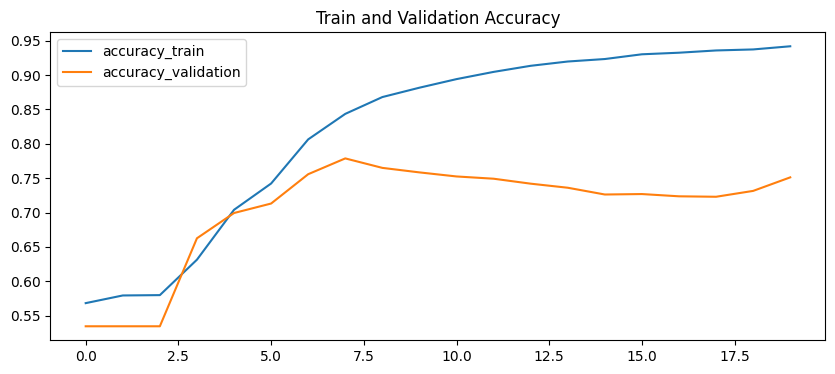

In [16]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 6: A single GRU layer is used. The number of units in the GRU layer is 8. In the GRU layer a kernel regularizer is used and it is set to a value of 0.0001. The optimizer is adam. 

In [17]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# GRU layer
model.add(tf.keras.layers.GRU(units = 8, activation = 'tanh', kernel_regularizer = tf.keras.regularizers.l2(0.0001), return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5347 - loss: 0.6947 - val_accuracy: 0.5345 - val_loss: 0.6927
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5790 - loss: 0.6887 - val_accuracy: 0.5345 - val_loss: 0.6884
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5787 - loss: 0.6811 - val_accuracy: 0.5345 - val_loss: 0.6812
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5793 - loss: 0.6694 - val_accuracy: 0.5351 - val_loss: 0.6671
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6056 - loss: 0.6485 - val_accuracy: 0.6362 - val_loss: 0.6441
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6908 - loss: 0.6185 - val_accuracy: 0.6763 - val_loss: 0.6239
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7085 - loss: 0.5913 - val_accuracy: 0.6921 - val_loss: 0.6086
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7284 - loss: 0.5646 - val_accuracy: 0.

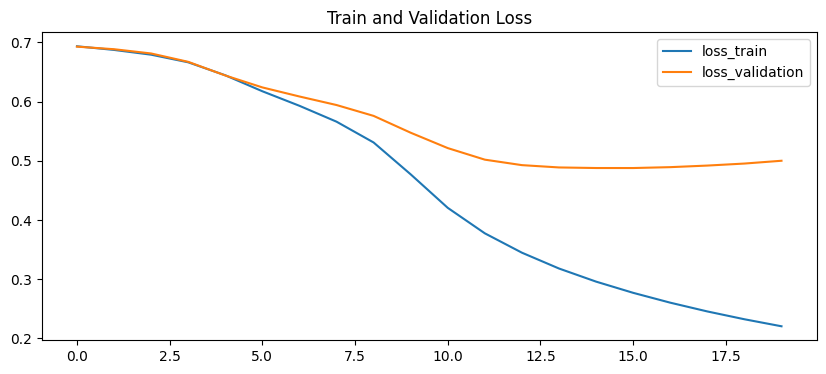

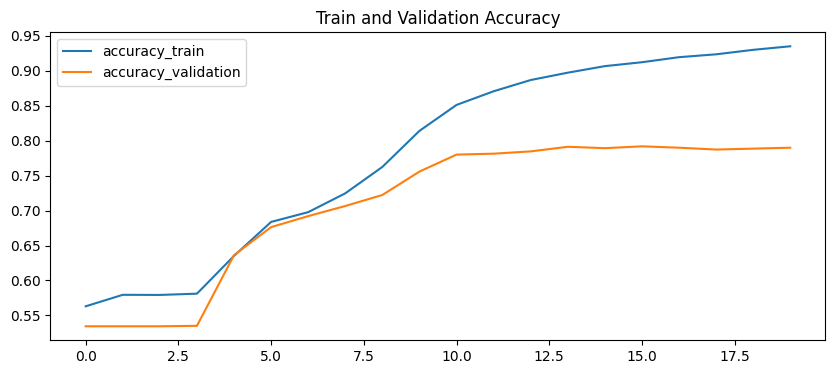

In [18]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 7: A single GRU layer is used. The number of units in the GRU layer is 8. In the GRU layer a kernel regularizer is used and it is set to a value of 0.001. The optimizer is adam. 

In [19]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# GRU layer
model.add(tf.keras.layers.GRU(units = 8, activation = 'tanh', kernel_regularizer = tf.keras.regularizers.l2(0.001), return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5344 - loss: 0.7197 - val_accuracy: 0.5345 - val_loss: 0.7149
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5787 - loss: 0.7101 - val_accuracy: 0.5345 - val_loss: 0.7078
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5787 - loss: 0.7002 - val_accuracy: 0.5345 - val_loss: 0.6995
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5787 - loss: 0.6881 - val_accuracy: 0.5345 - val_loss: 0.6871
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5833 - loss: 0.6703 - val_accuracy: 0.5469 - val_loss: 0.6665
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6468 - loss: 0.6431 - val_accuracy: 0.6730 - val_loss: 0.6441
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7058 - loss: 0.6152 - val_accuracy: 0.6881 - val_loss: 0.6269
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7153 - loss: 0.5902 - val_accuracy: 0.

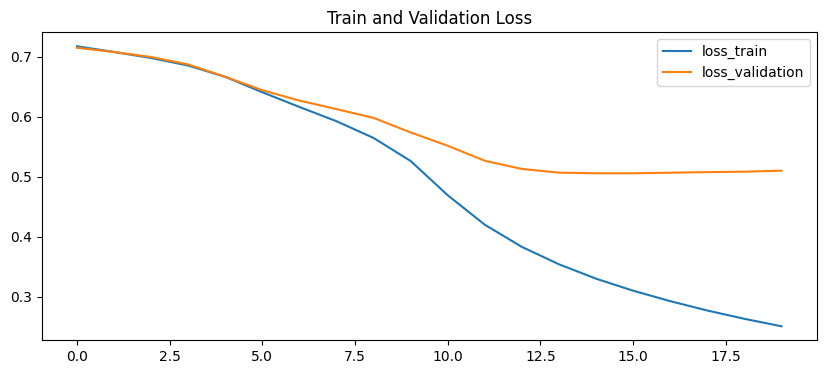

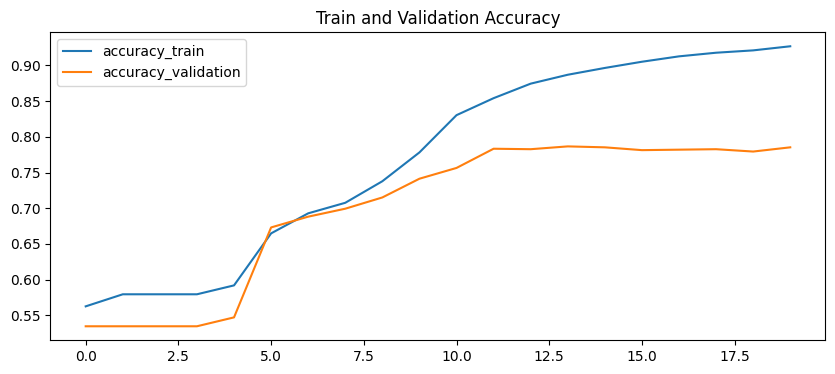

In [20]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 8: A single LSTM layer is used. The number of units in the LSTM layer is 8. No kernel regularizer is used. The optimizer is adam. 

In [21]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# LSTM layer
model.add(tf.keras.layers.LSTM(units = 8, activation = 'tanh', return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5425 - loss: 0.6918 - val_accuracy: 0.5345 - val_loss: 0.6873
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5784 - loss: 0.6818 - val_accuracy: 0.5345 - val_loss: 0.6680
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5809 - loss: 0.6518 - val_accuracy: 0.5732 - val_loss: 0.6484
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6350 - loss: 0.6262 - val_accuracy: 0.6520 - val_loss: 0.6306
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6856 - loss: 0.6023 - val_accuracy: 0.6783 - val_loss: 0.6125
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7264 - loss: 0.5749 - val_accuracy: 0.7091 - val_loss: 0.5949
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7651 - loss: 0.5407 - val_accuracy: 0.7393 - val_loss: 0.5773
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8056 - loss: 0.5006 - val_accuracy: 0.

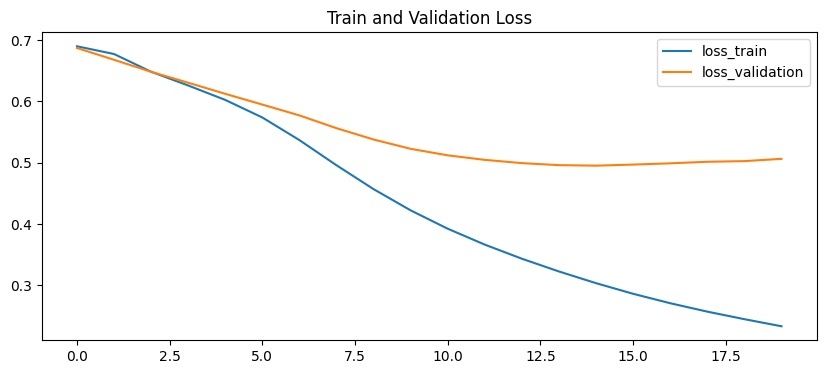

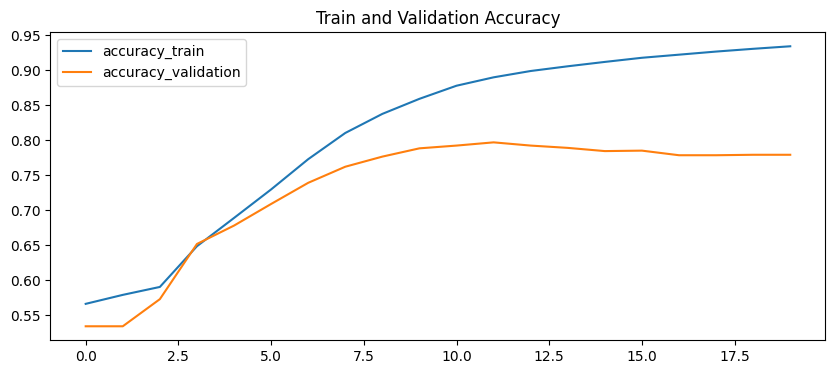

In [22]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

## Model 9: A single SimpleRNN layer is used. The number of units in the SimpleRNN layer is 8. No kernel regularizer is used. The optimizer is adam. 

In [23]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model = tf.keras.Sequential()

# embedding layer
model.add(tf.keras.layers.Embedding(10000, 32))

# SimpleRNN layer
model.add(tf.keras.layers.SimpleRNN(units = 8, activation = 'tanh', return_sequences = False))

# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5569 - loss: 0.6816 - val_accuracy: 0.5752 - val_loss: 0.6758
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6342 - loss: 0.6552 - val_accuracy: 0.6074 - val_loss: 0.6620
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6956 - loss: 0.6208 - val_accuracy: 0.6238 - val_loss: 0.6461
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7538 - loss: 0.5725 - val_accuracy: 0.6435 - val_loss: 0.6340
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7958 - loss: 0.5189 - val_accuracy: 0.6809 - val_loss: 0.6148
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8391 - loss: 0.4648 - val_accuracy: 0.6881 - val_loss: 0.6040
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8632 - loss: 0.4169 - val_accuracy: 0.6927 - val_loss: 0.5984
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8827 - loss: 0.3763 - val_accuracy: 0

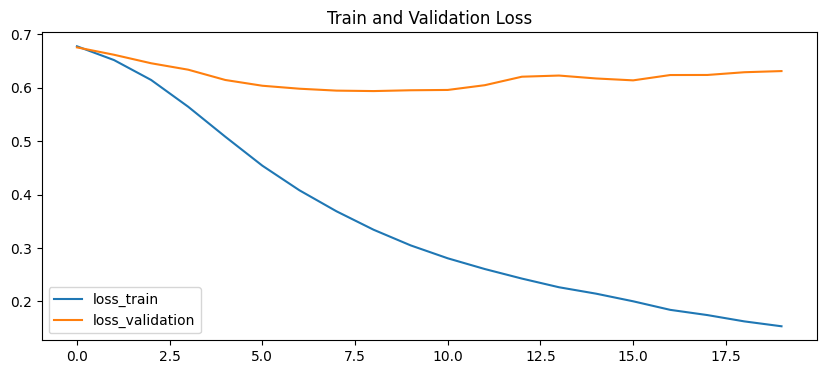

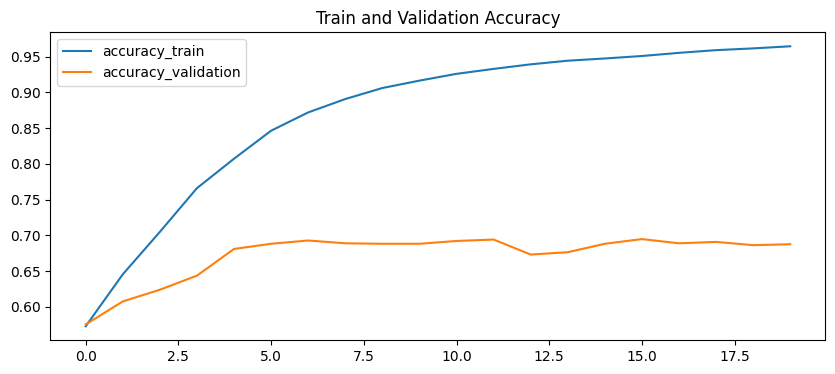

In [24]:
plt.figure(figsize = (10, 4))
plt.plot(model_output.history['loss'], label = "loss_train")
plt.plot(model_output.history['val_loss'], label = "loss_validation")
plt.legend()
plt.title("Train and Validation Loss")
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(model_output.history['accuracy'], label = "accuracy_train")
plt.plot(model_output.history['val_accuracy'], label = "accuracy_validation")
plt.legend()
plt.title("Train and Validation Accuracy")
plt.show()

# Results and Analysis.

## Below is a table summarizing the results of the nine different models that were run.

In [3]:
# organize data for table
data_for_table = [["1", "Single Layer GRU", "Adam", 'None', '15', '0.7925'], ["2", "Single Layer GRU", "SGD", 'None', '14-20', '0.5345'], ["3", "Single Layer GRU, # Units Doubled", "Adam", 'None', '20', '0.7669'], ["4", "Stacked Double Layer GRU", "Adam", 'None', '10', '0.7925'], ["5", "Single Layer GRU with Bidirectional Wrapper", "Adam", 'None', '8', '0.7787'], ["6", "Single Layer GRU", "Adam", 'l2 = 0.0001', '16', '0.7919'], ["7", "Single Layer GRU", "Adam", 'l2 = 0.001', '14', '0.7866'], ["8", "Single Layer LSTM", "Adam", "None", '12', '0.7971'], ["9", "Single Layer SimpleRNN", "Adam", "None", '16', '0.6947']]

# create data table
table_summary_models = pd.DataFrame(data_for_table, columns = ["Model #", "Model Type", "Optimizer", "Kernel Regularizer", "Epoch #", "Accuracy"])

# display table
pd.set_option('display.max_colwidth', None)

table_summary_models

,Model #,Model Type,Optimizer,Kernel Regularizer,Epoch #,Accuracy
0,1,Single Layer GRU,Adam,None,15,0.7925
1,2,Single Layer GRU,SGD,None,14-20,0.5345
2,3,"Single Layer GRU, # Units Doubled",Adam,None,20,0.7669
3,4,Stacked Double Layer GRU,Adam,None,10,0.7925
4,5,Single Layer GRU with Bidirectional Wrapper,Adam,None,8,0.7787
5,6,Single Layer GRU,Adam,l2 = 0.0001,16,0.7919
6,7,Single Layer GRU,Adam,l2 = 0.001,14,0.7866
7,8,Single Layer LSTM,Adam,None,12,0.7971
8,9,Single Layer SimpleRNN,Adam,None,16,0.6947


## When looking at the results of the nine models that were run, model 8 had the highest accuracy score of 0.7971. This model had a single LSTM layer and used Adam as the optimzer. Even though model 8 had the highest accuracy score, the other models that used GRU as the RNN type layer and used Adam as the optimizer had very similar accuracy scores. 

## The model with the lowest accuracy score of 0.5345 was model 2 that used GRU as the RNN type layer and used SGD as the optimizer. Clearly, Adam appears to be the superior optimizer over SGD, but it would be best to run at least a few more different types of RNN architectures using SGD to further verify this. 

## For model 9 that used a single SimpleRNN layer and used Adam as the optimizer, the accuracy score is 0.6947, which is a little lower than the accuracy score for both model 8 that used a single layer LSTM and used Adam as the optimzer and model 1 that used single layer GRU and used Adam as the optimizer.   

## Model 8 is run again below. It is run for 12 epochs because the highest accuracy score was achieved at that epoch. 

In [28]:
# set up neural network model
tf.keras.utils.set_random_seed(496)

# select type of model 
model_8 = tf.keras.Sequential()

# embedding layer
model_8.add(tf.keras.layers.Embedding(10000, 32))

# LSTM layer
model_8.add(tf.keras.layers.LSTM(units = 8, activation = 'tanh', return_sequences = False))

# output layer
model_8.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model_8.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), 
               metrics=['accuracy']
              )

model_output = model_8.fit(x = train_input_data_transformed, y = train_target_data_np, validation_split = 0.2, epochs = 12)

Epoch 1/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5425 - loss: 0.6918 - val_accuracy: 0.5345 - val_loss: 0.6873
Epoch 2/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5784 - loss: 0.6818 - val_accuracy: 0.5345 - val_loss: 0.6680
Epoch 3/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5809 - loss: 0.6518 - val_accuracy: 0.5732 - val_loss: 0.6484
Epoch 4/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6350 - loss: 0.6262 - val_accuracy: 0.6520 - val_loss: 0.6306
Epoch 5/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6856 - loss: 0.6023 - val_accuracy: 0.6783 - val_loss: 0.6125
Epoch 6/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7264 - loss: 0.5749 - val_accuracy: 0.7091 - val_loss: 0.5949
Epoch 7/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7651 - loss: 0.5407 - val_accuracy: 0.7393 - val_loss: 0.5773
Epoch 8/12
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8056 - loss: 0.5006 - val_accuracy: 0.

## The test data is opened as a pandas dataframe below.

In [30]:
# open csv file that contains train data as pandas dataframe
test_data_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

# separate out text column from test dataframe
test_input_data = test_data_df["text"].copy()

## Test input data is converted to proper form to be fed into trained model 8 below.

In [31]:
test_input_data_list = test_input_data.to_list()

token_machine = tf.keras.preprocessing.text.Tokenizer()

token_machine.fit_on_texts(test_input_data_list)

test_input_data_list_tokenized = token_machine.texts_to_sequences(test_input_data_list)

test_input_data_list_tokenized

test_input_data_list_tokenized_padded = tf.keras.preprocessing.sequence.pad_sequences(test_input_data_list_tokenized)

test_input_data_transformed = test_input_data_list_tokenized_padded

## Predicted labels for test data from trained model 8 are generated below.

In [32]:
## generate predicted values for test data from trained model 8
labels_predicted_model_8 = model_8.predict(test_input_data_transformed)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [35]:
## convert predicted decimal values to 0 or 1 labels for model 8
labels_predicted_model_8_0_1 = []

for value in labels_predicted_model_8:
    if value >= 0.5:
        labels_predicted_model_8_0_1.append(1) 
    else:
        labels_predicted_model_8_0_1.append(0)

## List of id's from test data created below.

In [36]:
# create list of id's from test data
test_ids = test_data_df["id"].copy()

test_ids = test_ids.to_list()

## Create csv file of test data id's and predicted labels below.

In [37]:
inner_values = {'id': test_ids, 'target': labels_predicted_model_8_0_1}
test_ids_labels = pd.DataFrame(inner_values)
test_ids_labels.to_csv("deep_learning_week_4_kaggle_natural_disaster_tweets_test_ids_labels.csv", index = False)

## The csv file that contains the ids and predicted labels was submitted to the Kaggle competition. 
## The F1 score was 0.57431.

# Conclusion and Discussion.

## When the predicted labels that were generated from model 8 were submitted to the Kaggle competition the F1 score was 0.57431. This shows that model 8 is picking up on certain characteristics of the tweets that distinguish ones that are reporting legitimate natural disasters and those that are not. A score of 0.57431 is considered somewhat poor though, so there is definitely many ways that model 8 and the other models can be improved to better predict which tweets are reporting legitimate natural disasters.

## Different architectures could yield better performances for the models. For instance, adding layers that are not RNN type could help. Such types of layers could include convolutional, dense, and pooling layers. Other hyperparameters could also be tuned to improve the performances of the models. It is also possible that the raw text data could be prepared in a different way that could further improve the performances of the models.

# Below is a list of references that I used while completing this project.

## Li, Susan. (2019, March 18) “A Complete Exploratory Data Anal- ysis and Visualization for Text Data: How to combine visualization and NLP in order to generate insights in an intuitive way.” Medium. https://towardsdatascience.com/a-complete-exploratory-data- analysis-and-visualization-for-text-data-29fb1b96fb6a.

## Venkatappa, Bhuvana. (2024, June 12) "Text Classification with Neural Networks Using Keras: A Step-by-Step Guide." Medium. https://medium.com/@bhuvanav/text-classification-with-neural-networks-using-keras-a-step-by-step-guide-87ee7f1b36a1.

## Nasher, Khulood. (2021, February 27) “Non-negative Matrix Factor- ization.” Medium. https://khuloodnasher.medium.com/non-negative- matrix-factorization-6a51eae6bce5.

## Daly, Quin. (2023, July 12) “Step-by-Step NMF Example in Python.” Medium. https://medium.com/@quindaly/step-by-step-nmf-example-in- python-9974e38dc9f9.

## Geetha M, Sri. (2021, June 5) "Building a Basic Binary Text Classifier using Keras." Medium. https://medium.com/nerd-for-tech/building-a-basic-binary-text-classifier-using-keras-4972a7c36616.

## No author. (2023, October 9) "Stacked RNNs in NLP." Geeks for Geeks. https://www.geeksforgeeks.org/stacked-rnns-in-nlp/.

## Mohsen Nabil. "Unveiling the Diversity: A Comprehensive Guide to Types of CNN Architectures." *Medium*. October 17, 2023.  https://medium.com/@navarai/unveiling-the-diversity-a-comprehensive-guide-to-types-of-cnn-architectures-9d70da0b4521.

## Victor Zhou. "Keras for Beginners: Implementing a Convolutional Neural Network, A beginner-friendly guide on using Keras to implement a simple Convolutional Neural Network (CNN) in Python." *victorzhou.com blog*. August 8, 2019. Updated November 10, 2020.  https://victorzhou.com/blog/keras-cnn-tutorial/.

## Samhita Alla. "Introduction to Keras, Part One: Data Loading." *Medium*. December 11, 2020.  https://medium.com/towards-data-science/introduction-to-keras-part-one-data-loading-43b9c015e27c#:~:text=The%20data%20has%20to%20be,Dataset%20objects%2C%20and%20Python%20generators.

## Kartik Menon. "Ultimate Guide To Building Powerful Keras Image Classification Models." *simplilearn*. September 17, 2024.  https://simplilearn.com/tutorials/deep-learning-tutorial/guide-to-building-powerful-keras-image-classification-models

## Golnaz Hosseini. "Step-by-Step Tutorial: Image Classification with Keras." *Medium*. May 2, 2023.  https://medium.com/@golnaz.hosseini/step-by-step-tutorial-image-classification-with-keras-7dc423f79a6b.

##  Adrian Rosebrock. "Keras Conv2D and Convolutional Layers." *pyimagesearch*. December 31, 2018.  https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/.

## Adrian Rosebrock. "Convolutional Neural Networks (CNNs) and Layer Types." *pyimagesearch*. May 14, 2021.  https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/.

## Abhishek Jain. "Deep Learning Architecture 7 : DenseNet." *Medium*. Dec 16, 2024.  https://medium.com/@abhishekjainindore24/deep-learning-architecture-7-densenet-feee44d57f89#:~:text=DenseNet%20architecture%20is%20based%20on,of%20all%20the%20previous%20blocks.

## Deep, Akash. "Understanding NLP Keras Tokenizer Class Arguments with example." *Medium*. Aug 22, 2020. https://medium.com/analytics-vidhya/understanding-nlp-keras-tokenizer-class-arguments-with-example-551c100f0cbd.